In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

from sklearn.pipeline import Pipeline # конвейер обработки
from sklearn.model_selection import GridSearchCV # грид серч
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import  GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn import metrics
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from imblearn.over_sampling import SMOTE

# 1.Загрузка Данных

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_3/train.csv')

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# 2.Исследование данных

In [ ]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df.shape

(31962, 3)

## 2.1. Пропуски

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
df.isna().any()

id       False
label    False
tweet    False
dtype: bool

## 2.3.Дубликаты

In [3]:
df.drop_duplicates()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


## 2.4. Кодировка данных

In [ ]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

## 2.5. Баланс в данных


In [ ]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

Доля данных с лейблом 1 (rasist tweet) составляет ~ 7,5% :

In [ ]:
df.label.value_counts()[1] / df.label.value_counts()[0] * 100

7.543741588156124

# 3.Предобработка данных

## 3.1. Разбиваем данные на X и y

In [4]:
X = df.tweet.to_numpy() # конвертирую в np.array
X

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you @user for you follow  '], dtype=object)

In [5]:
y = df.label.values
y

array([0, 0, 0, ..., 0, 1, 0])

## 3.3 Test/Train

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 4.Алгоритм

## 4.1 Test ComplementNB with tfidf

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer().fit(X)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [8]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB().fit(X_train_tfidf, y_train)

In [9]:
from sklearn.metrics import classification_report

# треин данные
y_pred = clf.predict(X_train_tfidf)
print(classification_report(y_train, y_pred, target_names=['Негативные', 'Позитивные']))

              precision    recall  f1-score   support

  Негативные       0.97      0.98      0.98     23772
  Позитивные       0.73      0.54      0.62      1797

    accuracy                           0.95     25569
   macro avg       0.85      0.76      0.80     25569
weighted avg       0.95      0.95      0.95     25569



In [10]:
# тестовые данные
y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, target_names=['Негативные', 'Позитивные']))

              precision    recall  f1-score   support

  Негативные       0.96      0.96      0.96      5948
  Позитивные       0.47      0.45      0.46       445

    accuracy                           0.93      6393
   macro avg       0.72      0.71      0.71      6393
weighted avg       0.93      0.93      0.93      6393



nn_mtx = [[5721  227]
 [ 243  202]]


Text(0.5, 51.0, 'Predicted value')

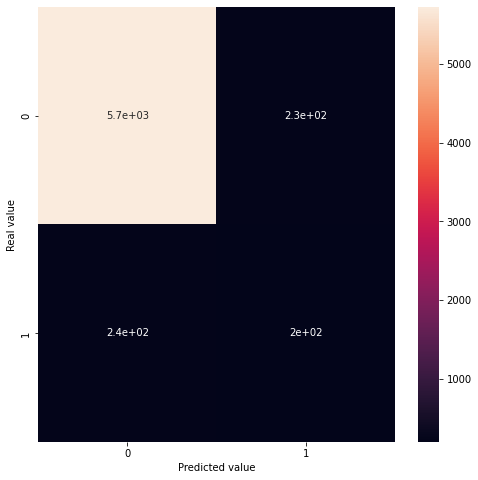

In [11]:
from sklearn import metrics

nn_mtx = metrics.confusion_matrix(y_test, y_pred)
print(f'nn_mtx = {nn_mtx}')

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

## 4.2 pipeline

In [12]:
from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [13]:
estimators = [
    ('vectorizer', CountVectorizer(binary=True)),
    ('to_dense', DenseTransformer()),
    ('classifier', ComplementNB())
]

pipe = Pipeline(estimators)
pipe.named_steps

{'vectorizer': CountVectorizer(binary=True),
 'to_dense': <__main__.DenseTransformer at 0x7f9d2f5d4c50>,
 'classifier': ComplementNB()}

In [14]:
pipe.fit(X_train, y_train)
predicted = pipe.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted, target_names=['Негативные', 'Позитивные']))

              precision    recall  f1-score   support

  Негативные       0.97      0.98      0.97      5948
  Позитивные       0.69      0.56      0.62       445

    accuracy                           0.95      6393
   macro avg       0.83      0.77      0.80      6393
weighted avg       0.95      0.95      0.95      6393



## 4.3 Гридсерч

In [16]:
parameters = {
  'vectorizer': [CountVectorizer(binary=False),CountVectorizer(binary=True),TfidfVectorizer()],
  'classifier' : [MultinomialNB(),ComplementNB(),BernoulliNB(),CategoricalNB()]
}

In [17]:
grid = GridSearchCV(pipe, parameters, n_jobs = None, verbose = 3,cv = 2, scoring = 'f1')
grid.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=MultinomialNB(), vectorizer=CountVectorizer();, score=0.483 total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=MultinomialNB(), vectorizer=CountVectorizer();, score=0.494 total time=  19.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=MultinomialNB(), vectorizer=CountVectorizer(binary=True);, score=0.484 total time=  19.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=MultinomialNB(), vectorizer=CountVectorizer(binary=True);, score=0.495 total time=  19.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=MultinomialNB(), vectorizer=TfidfVectorizer();, score=0.163 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=MultinomialNB(), vectorizer=TfidfVectorizer();, score=0.117 total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=ComplementNB(), vectorizer=CountVectorizer();, score=0.550 total time=  19.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=ComplementNB(), vectorizer=CountVectorizer();, score=0.564 total time=  19.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=ComplementNB(), vectorizer=CountVectorizer(binary=True);, score=0.554 total time=  19.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=ComplementNB(), vectorizer=CountVectorizer(binary=True);, score=0.565 total time=  19.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=ComplementNB(), vectorizer=TfidfVectorizer();, score=0.446 total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=ComplementNB(), vectorizer=TfidfVectorizer();, score=0.466 total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=BernoulliNB(), vectorizer=CountVectorizer();, score=0.111 total time=  20.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=BernoulliNB(), vectorizer=CountVectorizer();, score=0.077 total time=  20.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=BernoulliNB(), vectorizer=CountVectorizer(binary=True);, score=0.111 total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=BernoulliNB(), vectorizer=CountVectorizer(binary=True);, score=0.077 total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=BernoulliNB(), vectorizer=TfidfVectorizer();, score=0.111 total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=BernoulliNB(), vectorizer=TfidfVectorizer();, score=0.077 total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer

[CV 1/2] END classifier=CategoricalNB(), vectorizer=CountVectorizer();, score=nan total time=  19.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer

[CV 2/2] END classifier=CategoricalNB(), vectorizer=CountVectorizer();, score=nan total time=  19.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=CategoricalNB(), vectorizer=CountVectorizer(binary=True);, score=0.111 total time=  42.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=CategoricalNB(), vectorizer=CountVectorizer(binary=True);, score=0.077 total time=  40.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer

[CV 1/2] END classifier=CategoricalNB(), vectorizer=TfidfVectorizer();, score=nan total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer

[CV 2/2] END classifier=CategoricalNB(), vectorizer=TfidfVectorizer();, score=nan total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(binary=True)),
                                       ('to_dense',
                                        <__main__.DenseTransformer object at 0x7f9d2f5d4c50>),
                                       ('classifier', ComplementNB())]),
             param_grid={'classifier': [MultinomialNB(), ComplementNB(),
                                        BernoulliNB(), CategoricalNB()],
                         'vectorizer': [CountVectorizer(),
                                        CountVectorizer(binary=True),
                                        TfidfVectorizer()]},
             scoring='f1', verbose=3)

In [18]:
print(f'best params : {grid.best_params_}')
print(f'best estimator : {grid.best_estimator_}')
print(f'best score : {grid.best_score_}')

best params : {'classifier': ComplementNB(), 'vectorizer': CountVectorizer(binary=True)}
best estimator : Pipeline(steps=[('vectorizer', CountVectorizer(binary=True)),
                ('to_dense',
                 <__main__.DenseTransformer object at 0x7f9d2b1008d0>),
                ('classifier', ComplementNB())])
best score : 0.5594793284262285


In [19]:
from joblib import dump, load

estimator = grid.best_estimator_
dump(estimator, "/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_3/gridsearch_1.joblib")

['/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_3/gridsearch_1.joblib']

In [ ]:
# можно загружить объект best_estimator_ чтобы потом его использовать и не считать заново gridsearch

# from joblib import dump, load
# estimator = load("/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_3/gridsearch_1.joblib")

In [ ]:
# print(metrics.classification_report(y_train,estimator.predict(X_train))) крашится сразу постоянно

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [20]:
print(metrics.classification_report(y_test,estimator.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5948
           1       0.69      0.56      0.62       445

    accuracy                           0.95      6393
   macro avg       0.83      0.77      0.80      6393
weighted avg       0.95      0.95      0.95      6393



## 4.4 Использую stop words

с лучшими предыдущими параметрами 

In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [22]:
estimators = [
    ('vectorizer', CountVectorizer(binary=False,stop_words=ENGLISH_STOP_WORDS)),
    ('to_dense', DenseTransformer()),
    ('classifier', ComplementNB())
]

pipe = Pipeline(estimators)
pipe.named_steps

{'vectorizer': CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                       'afterwards', 'again', 'against', 'all',
                                       'almost', 'alone', 'along', 'already',
                                       'also', 'although', 'always', 'am',
                                       'among', 'amongst', 'amoungst', 'amount',
                                       'an', 'and', 'another', 'any', 'anyhow',
                                       'anyone', 'anything', 'anyway',
                                       'anywhere', ...})),
 'to_dense': <__main__.DenseTransformer at 0x7f9d2b54d810>,
 'classifier': ComplementNB()}

In [23]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=['Негативные', 'Позитивные']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


              precision    recall  f1-score   support

  Негативные       0.98      0.97      0.97      5948
  Позитивные       0.61      0.68      0.64       445

    accuracy                           0.95      6393
   macro avg       0.79      0.82      0.81      6393
weighted avg       0.95      0.95      0.95      6393



Метрики незначительно лучше стали

## 4.5 Гридсерч со стоп словами

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [25]:
parameters = {
  'vectorizer': [CountVectorizer(binary=False,stop_words=ENGLISH_STOP_WORDS),
                 CountVectorizer(binary=True,stop_words=ENGLISH_STOP_WORDS),
                 TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)],
  'classifier' : [MultinomialNB(),ComplementNB(),BernoulliNB(),CategoricalNB()]
}

In [26]:
grid = GridSearchCV(pipe, parameters, n_jobs = None, verbose = 3,cv = 2,scoring = 'f1')
grid.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=MultinomialNB(), vectorizer=CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.567 total time=  27.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=MultinomialNB(), vectorizer=CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.578 total time=  19.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=MultinomialNB(), vectorizer=CountVectorizer(binary=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.580 total time=  19.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=MultinomialNB(), vectorizer=CountVectorizer(binary=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.576 total time=  19.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=MultinomialNB(), vectorizer=TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.204 total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=MultinomialNB(), vectorizer=TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.152 total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=ComplementNB(), vectorizer=CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.597 total time=  21.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=ComplementNB(), vectorizer=CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.600 total time=  20.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=ComplementNB(), vectorizer=CountVectorizer(binary=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.612 total time=  19.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=ComplementNB(), vectorizer=CountVectorizer(binary=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.610 total time=  19.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=ComplementNB(), vectorizer=TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.562 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=ComplementNB(), vectorizer=TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.576 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=BernoulliNB(), vectorizer=CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.069 total time=  26.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=BernoulliNB(), vectorizer=CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.075 total time=  26.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=BernoulliNB(), vectorizer=CountVectorizer(binary=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.069 total time=  26.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=BernoulliNB(), vectorizer=CountVectorizer(binary=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.075 total time=  26.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=BernoulliNB(), vectorizer=TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.069 total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=BernoulliNB(), vectorizer=TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.075 total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer

[CV 1/2] END classifier=CategoricalNB(), vectorizer=CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=nan total time=  20.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer

[CV 2/2] END classifier=CategoricalNB(), vectorizer=CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=nan total time=  20.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 1/2] END classifier=CategoricalNB(), vectorizer=CountVectorizer(binary=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.069 total time=  42.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[CV 2/2] END classifier=CategoricalNB(), vectorizer=CountVectorizer(binary=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=0.075 total time=  46.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer

[CV 1/2] END classifier=CategoricalNB(), vectorizer=TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=nan total time=  24.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer

[CV 2/2] END classifier=CategoricalNB(), vectorizer=TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}));, score=nan total time=  23.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                              'almost',
                                                      

In [27]:
print(f'best params : {grid.best_params_}')
print(f'best estimator : {grid.best_estimator_}')
print(f'best score : {grid.best_score_}')

best params : {'classifier': ComplementNB(), 'vectorizer': CountVectorizer(binary=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))}
best estimator : Pipeline(steps=[('vectorizer',
                 CountVectorizer(binary=True,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 

In [28]:
from joblib import dump, load

estimator = grid.best_estimator_
dump(estimator, "/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_3/gridsearch_with_stopwords.joblib")

# # Somewhere else
# estimator = load("your-model.joblib")

['/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_3/gridsearch_with_stopwords.joblib']

In [29]:
print(metrics.classification_report(y_test,estimator.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5948
           1       0.61      0.68      0.64       445

    accuracy                           0.95      6393
   macro avg       0.79      0.82      0.81      6393
weighted avg       0.95      0.95      0.95      6393



Метрики такие же получились, в принципе грид серч выбрал все теже параметры что и в предыдущем пункте я сделал сразу с бест параметрами

## 4.6 TF-IDF c ngrams c pipeline (крашится)

Попытался через пайплайн прогнать TfidfVectorizer, но память у колаба ( и локально) переполняется и runtime перезапускается, поэтому не получилось тут результаты получить

In [ ]:
estimators = [
    ('vectorizer', TfidfVectorizer(stop_words=None, ngram_range=(1,3))),
    ('to_dense', DenseTransformer()),
    ('classifier', ComplementNB())
]

pipe = Pipeline(estimators)
pipe.named_steps

{'vectorizer': TfidfVectorizer(ngram_range=(1, 3)),
 'to_dense': <__main__.DenseTransformer at 0x7fd0ea4c5790>,
 'classifier': MultinomialNB()}

In [ ]:
# сразу крашится тк переполняется память

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=['Негативные', 'Позитивные']))

## 4.7 TF-IDF c ngrams без pipeline

Раз tfidf через пайплан крашится, попробую без него напрямую пошагово

In [30]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [31]:
tfidf_vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,3)).fit(X)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [32]:
clf = ComplementNB().fit(X_train_tfidf, y_train)

In [33]:
y_pred = clf.predict(X_train_tfidf)
print(metrics.classification_report(y_train, y_pred, target_names=['Негативные', 'Позитивные']))

              precision    recall  f1-score   support

  Негативные       0.99      1.00      1.00     23772
  Позитивные       0.99      0.91      0.95      1797

    accuracy                           0.99     25569
   macro avg       0.99      0.95      0.97     25569
weighted avg       0.99      0.99      0.99     25569



In [34]:
y_pred = clf.predict(X_test_tfidf)
print(metrics.classification_report(y_test, y_pred, target_names=['Негативные', 'Позитивные']))

              precision    recall  f1-score   support

  Негативные       0.97      0.94      0.96      5948
  Позитивные       0.45      0.68      0.54       445

    accuracy                           0.92      6393
   macro avg       0.71      0.81      0.75      6393
weighted avg       0.94      0.92      0.93      6393



На треин данных алгоритм показал себя хорошо, но на тестовых просел. Можно отметить что алгоритм плохо определяет 2й класс, recall всегда низкий около 0.5-0.7, в то время как у 1го класса больше 0.95

## 4.7 TF-IDF + ngrams + gridsearch (крашится)

Тут гридсерч как и через пайплайн крашится

In [ ]:
estimators = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1,3))),
    ('to_dense', DenseTransformer()),
    ('classifier', ComplementNB())
]

pipe = Pipeline(estimators)
pipe.named_steps

{'vectorizer': TfidfVectorizer(ngram_range=(1, 3)),
 'to_dense': <__main__.DenseTransformer at 0x7fec6fe10e10>,
 'classifier': ComplementNB()}

In [ ]:
parameters = {
  'vectorizer__ngram_range': [(1,3),(1,4),(1,5)],
  'classifier' : [MultinomialNB(),ComplementNB()]
}

In [ ]:
# так же крашится сразу
grid = GridSearchCV(pipe, parameters, n_jobs = None, verbose = 3,cv = 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


## 4.8 TF-IDF + ngrams + ручной перебор тк pipeline и gridsearch крашатся

In [35]:
def perebor_ngrams(classifiers,vectorizer,ngrams,X = X,X_train = X_train,X_test = X_test,y_train = y_train, y_test = y_test):
  for classifier in classifiers:
    for ngram in ngrams:
      vectorized = vectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=ngram).fit(X)
      X_train_vect = vectorized.transform(X_train)
      X_test_vect = vectorized.transform(X_test)
      clf = classifier.fit(X_train_vect, y_train)
      y_pred = clf.predict(X_test_vect)
      print(f'classifier: {classifier}, ngram: {ngram}')
      print(metrics.classification_report(y_test, y_pred, target_names=['Негативные', 'Позитивные']))

In [38]:
classifiers = [MultinomialNB(),ComplementNB(),BernoulliNB()]
ngrams = [(1,2),(1,3),(1,4),(1,5)]

In [39]:
perebor_ngrams(classifiers,TfidfVectorizer,ngrams)

classifier: MultinomialNB(), ngram: (1, 2)
              precision    recall  f1-score   support

  Негативные       0.94      1.00      0.97      5948
  Позитивные       1.00      0.12      0.21       445

    accuracy                           0.94      6393
   macro avg       0.97      0.56      0.59      6393
weighted avg       0.94      0.94      0.92      6393

classifier: MultinomialNB(), ngram: (1, 3)
              precision    recall  f1-score   support

  Негативные       0.94      1.00      0.97      5948
  Позитивные       1.00      0.12      0.22       445

    accuracy                           0.94      6393
   macro avg       0.97      0.56      0.59      6393
weighted avg       0.94      0.94      0.92      6393

classifier: MultinomialNB(), ngram: (1, 4)
              precision    recall  f1-score   support

  Негативные       0.94      1.00      0.97      5948
  Позитивные       1.00      0.12      0.22       445

    accuracy                           0.94      6393

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classifier: BernoulliNB(), ngram: (1, 3)
              precision    recall  f1-score   support

  Негативные       0.93      1.00      0.96      5948
  Позитивные       0.00      0.00      0.00       445

    accuracy                           0.93      6393
   macro avg       0.47      0.50      0.48      6393
weighted avg       0.87      0.93      0.90      6393



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classifier: BernoulliNB(), ngram: (1, 4)
              precision    recall  f1-score   support

  Негативные       0.93      1.00      0.96      5948
  Позитивные       0.00      0.00      0.00       445

    accuracy                           0.93      6393
   macro avg       0.47      0.50      0.48      6393
weighted avg       0.87      0.93      0.90      6393



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classifier: BernoulliNB(), ngram: (1, 5)
              precision    recall  f1-score   support

  Негативные       0.93      1.00      0.96      5948
  Позитивные       0.00      0.00      0.00       445

    accuracy                           0.93      6393
   macro avg       0.47      0.50      0.48      6393
weighted avg       0.87      0.93      0.90      6393



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Как видно из результатов у MultinomialNB recall в районе 0.12 для 2го класса; для ComplementNB precision (способность правильно обнаруживать класс) для 2го класса просел, а recall(способность вообще идентифицировать класс) повысился до 0.7 примерно

## 4.9 Попробую аугментацию SMOTE


In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [41]:
tfidf_vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,3)).fit(X)

X_tfidf = tfidf_vectorizer.transform(X)

In [42]:
X_tfidf

<31962x354942 sparse matrix of type '<class 'numpy.float64'>'
	with 646469 stored elements in Compressed Sparse Row format>

In [43]:
sm = SMOTE(random_state=42)
X_tfidf_smote, y_tfidf_smote = sm.fit_resample(X_tfidf, y)

In [44]:
X_tfidf_smote

<59440x354942 sparse matrix of type '<class 'numpy.float64'>'
	with 1427952 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_smote, y_tfidf_smote, test_size=0.2)

In [46]:
clf = ComplementNB().fit(X_train, y_train)

In [47]:
y_pred = clf.predict(X_train)
print(metrics.classification_report(y_train, y_pred, target_names=['Негативные', 'Позитивные']))

              precision    recall  f1-score   support

  Негативные       1.00      0.98      0.99     23778
  Позитивные       0.98      1.00      0.99     23774

    accuracy                           0.99     47552
   macro avg       0.99      0.99      0.99     47552
weighted avg       0.99      0.99      0.99     47552



In [48]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=['Негативные', 'Позитивные']))

              precision    recall  f1-score   support

  Негативные       1.00      0.90      0.95      5942
  Позитивные       0.91      1.00      0.95      5946

    accuracy                           0.95     11888
   macro avg       0.95      0.95      0.95     11888
weighted avg       0.95      0.95      0.95     11888



Тут метрики стали в разы лучше

## 4.10 Попробую с пайплайном и гридсерчем (крашится)

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [ ]:
estimators = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1,3))),
    ('osm', SMOTE(random_state=42)),
    ('to_dense', DenseTransformer()),
    ('classifier', ComplementNB())
]

pipe = Pipeline(estimators)
pipe.named_steps

{'vectorizer': TfidfVectorizer(ngram_range=(1, 3)),
 'osm': SMOTE(random_state=42),
 'to_dense': <__main__.DenseTransformer at 0x7f73fc29f350>,
 'classifier': ComplementNB()}

In [ ]:
parameters = {
  'vectorizer__ngram_range': [(1,3),(1,4),(1,5)],
  'classifier' : [MultinomialNB(),ComplementNB()]
}

In [ ]:
# так же крашится сразу
grid = GridSearchCV(pipe, parameters, n_jobs = None, verbose = 3,cv = 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


## 4.11 Попробую аугментация RandomUnderSampler + понизить размерность с TruncatedSVD

In [59]:
tfidf_vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,3)).fit(X)

X_tfidf = tfidf_vectorizer.transform(X)

In [ ]:
# sm = SMOTE(random_state=42)
# X_tfidf_smote, y_tfidf_smote = sm.fit_resample(X_tfidf, y)

In [60]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_tfidf_rus, y_tfidf_rus = rus.fit_resample(X_tfidf, y)

в алгоритм ComplementNB нельзя отрицательные числа, поэтому думал нормализовать но Standardcaler не может центрировать sparse матрицы


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_tfidf_smote_scaled = scaler.fit_transform(X_tfidf_smote)

ValueError: ignored

MinMaxScaler так же не поддерживает sparse матрицы, а если к ним применять метод todense() то колаб крашится изза переполнения памяти

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_tfidf_smote_scaled = scaler.fit_transform(X_tfidf_smote)

TypeError: ignored

In [ ]:
# from sklearn.preprocessing import MaxAbsScaler
# scaler = MaxAbsScaler()
# X_tsvd_scaled = scaler.fit_transform(X_tsvd)

truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [61]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=100, random_state=40) # судя по доке n_components For LSA, a value of 100 is recommended.
tsvd.fit(X_tfidf_rus)
X_tsvd = tsvd.transform(X_tfidf_rus)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tsvd, y_tfidf_rus, test_size=0.2)

In [55]:
clf = ComplementNB().fit(X_train, y_train) # отрицателные значения не может принимать -> GaussianNB использую

ValueError: ignored

In [63]:
clf = GaussianNB().fit(X_train, y_train)

In [64]:
y_pred = clf.predict(X_train)
print(metrics.classification_report(y_train, y_pred, target_names=['Негативные', 'Позитивные']))

              precision    recall  f1-score   support

  Негативные       0.65      0.93      0.76      1791
  Позитивные       0.87      0.50      0.64      1796

    accuracy                           0.71      3587
   macro avg       0.76      0.71      0.70      3587
weighted avg       0.76      0.71      0.70      3587



In [65]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=['Негативные', 'Позитивные']))

              precision    recall  f1-score   support

  Негативные       0.65      0.92      0.76       451
  Позитивные       0.86      0.50      0.63       446

    accuracy                           0.71       897
   macro avg       0.76      0.71      0.70       897
weighted avg       0.76      0.71      0.70       897



Думаю если бы был ComplementNB то метрики были бы лучше